# Predicting Chronic Kidney Disease Using Machine Learning Classification Models for Early Identification and Decision Support

Building a model to predict the possibility of a patient developing chronic kidney disease

In [1]:
!pip install xgboost

In [2]:
# These are some of the libraries needed for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

## Data Exploration

In [3]:
#read the csv data and name it "dataset"

dataset = pd.read_csv("/Users/mac/Downloads/Chronic_Kidney_Dsease_data.csv")



In [4]:
#.shape is to check the number of instances and variables we have in the data

dataset.shape


(1659, 54)

In [5]:
#.head is used to view the first 5 rows of the data

dataset.head()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,1,71,0,0,0,2,31.069414,1,5.128112,1.676220,...,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1,Confidential
1,2,34,0,0,1,3,29.692119,1,18.609552,8.377574,...,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1,Confidential
2,3,80,1,1,0,1,37.394822,1,11.882429,9.607401,...,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1,Confidential
3,4,40,0,2,0,1,31.329680,0,16.020165,0.408871,...,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1,Confidential
4,5,43,0,1,1,2,23.726311,0,7.944146,0.780319,...,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1,Confidential


In [6]:
# .tail is used to view the last 5 rows of the data
dataset.tail()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
1654,1655,90,0,0,1,2,39.677059,1,1.370151,4.157954,...,2.138976,81.102765,0,0,0,0.951836,9.547583,2.046212,0,Confidential
1655,1656,34,0,0,2,1,28.922015,0,3.372073,9.647525,...,7.911566,10.600428,0,1,0,3.604147,1.609847,0.324417,0,Confidential
1656,1657,84,0,0,2,3,21.951219,0,15.825955,7.349964,...,0.015531,69.633427,0,0,0,0.801955,5.768617,4.935108,0,Confidential
1657,1658,90,0,0,2,2,24.964149,0,12.967462,0.618614,...,3.432765,31.858023,0,0,0,0.560298,2.744519,0.322592,1,Confidential
1658,1659,34,1,1,0,0,19.253258,1,11.396510,7.446314,...,9.293499,82.314878,0,0,0,1.754852,0.186400,4.553608,1,Confidential


In [7]:
# this will help us see columns that are missing and also show us the data types
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PatientID                      1659 non-null   int64  
 1   Age                            1659 non-null   int64  
 2   Gender                         1659 non-null   int64  
 3   Ethnicity                      1659 non-null   int64  
 4   SocioeconomicStatus            1659 non-null   int64  
 5   EducationLevel                 1659 non-null   int64  
 6   BMI                            1659 non-null   float64
 7   Smoking                        1659 non-null   int64  
 8   AlcoholConsumption             1659 non-null   float64
 9   PhysicalActivity               1659 non-null   float64
 10  DietQuality                    1659 non-null   float64
 11  SleepQuality                   1659 non-null   float64
 12  FamilyHistoryKidneyDisease     1659 non-null   i

In [8]:
dataset.describe()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
count,1659.000000,1659.000000,1659.000000,1659.00000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,...,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000
mean,830.000000,54.441230,0.515371,0.71308,0.977697,1.693189,27.620049,0.292948,9.969831,5.024247,...,3.525510,5.054869,49.730659,0.044002,0.103074,0.197107,2.000336,4.947788,5.144973,0.918626
std,479.056364,20.549757,0.499914,1.00043,0.776686,0.910611,7.288670,0.455252,5.798787,2.866274,...,2.026131,2.880460,27.827593,0.205162,0.304147,0.397934,1.141635,2.869959,2.901138,0.273492
min,1.000000,20.000000,0.000000,0.00000,0.000000,0.000000,15.033888,0.000000,0.021740,0.001186,...,0.006327,0.013697,0.087256,0.000000,0.000000,0.000000,0.001082,0.005392,0.004436,0.000000
25%,415.500000,36.000000,0.000000,0.00000,0.000000,1.000000,21.471449,0.000000,5.051156,2.555038,...,1.820793,2.532867,26.991708,0.000000,0.000000,0.000000,1.005802,2.498119,2.569561,1.000000
50%,830.000000,54.000000,1.000000,0.00000,1.000000,2.000000,27.652077,0.000000,9.951503,5.072395,...,3.572522,5.087086,48.970075,0.000000,0.000000,0.000000,2.040635,4.974069,5.182949,1.000000
75%,1244.500000,72.000000,1.000000,1.00000,2.000000,2.000000,34.015849,1.000000,14.967100,7.460563,...,5.254956,7.552093,73.913997,0.000000,0.000000,0.000000,2.947213,7.499783,7.733253,1.000000
max,1659.000000,90.000000,1.000000,3.00000,2.000000,3.000000,39.993532,1.000000,19.992713,9.998167,...,6.984636,9.998313,99.987510,1.000000,1.000000,1.000000,3.999469,9.992345,9.993754,1.000000


Next, we will be removing some columns that are either not necessary to the classification model or directly indicates the presence of Chronic Kidney Disease, which will defeat the purpose of the project which is to predict the model.

## Data Cleaning 

In [9]:
# here we will create a copy of the dataset but this copy will only contain cleaned data
cleaned_dataset = dataset.copy()


In [10]:
#axis = 1 means drop column or columns while axis = 0 means drop rows
# inplace = True means it is updating the dataframe directly(no need to reassign)

cleaned_dataset.drop(["PatientID", "DoctorInCharge",
                                "SerumCreatinine", "BUNLevels",
                                "GFR", "ProteinInUrine", "ACR",
                                "SerumElectrolytesSodium", "SerumElectrolytesPotassium",
                               "SerumElectrolytesCalcium", "SerumElectrolytesPhosphorus",
                               "HemoglobinLevels", "Edema"], axis = 1, inplace = True)




In [11]:
cleaned_dataset.describe()

,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
count,1659.000000,1659.000000,1659.00000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,...,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000
mean,54.441230,0.515371,0.71308,0.977697,1.693189,27.620049,0.292948,9.969831,5.024247,5.028544,...,3.525510,5.054869,49.730659,0.044002,0.103074,0.197107,2.000336,4.947788,5.144973,0.918626
std,20.549757,0.499914,1.00043,0.776686,0.910611,7.288670,0.455252,5.798787,2.866274,2.865777,...,2.026131,2.880460,27.827593,0.205162,0.304147,0.397934,1.141635,2.869959,2.901138,0.273492
min,20.000000,0.000000,0.00000,0.000000,0.000000,15.033888,0.000000,0.021740,0.001186,0.002407,...,0.006327,0.013697,0.087256,0.000000,0.000000,0.000000,0.001082,0.005392,0.004436,0.000000
25%,36.000000,0.000000,0.00000,0.000000,1.000000,21.471449,0.000000,5.051156,2.555038,2.558443,...,1.820793,2.532867,26.991708,0.000000,0.000000,0.000000,1.005802,2.498119,2.569561,1.000000
50%,54.000000,1.000000,0.00000,1.000000,2.000000,27.652077,0.000000,9.951503,5.072395,4.989810,...,3.572522,5.087086,48.970075,0.000000,0.000000,0.000000,2.040635,4.974069,5.182949,1.000000
75%,72.000000,1.000000,1.00000,2.000000,2.000000,34.015849,1.000000,14.967100,7.460563,7.428290,...,5.254956,7.552093,73.913997,0.000000,0.000000,0.000000,2.947213,7.499783,7.733253,1.000000
max,90.000000,1.000000,3.00000,2.000000,3.000000,39.993532,1.000000,19.992713,9.998167,9.998927,...,6.984636,9.998313,99.987510,1.000000,1.000000,1.000000,3.999469,9.992345,9.993754,1.000000


In [12]:
cleaned_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1659 non-null   int64  
 1   Gender                         1659 non-null   int64  
 2   Ethnicity                      1659 non-null   int64  
 3   SocioeconomicStatus            1659 non-null   int64  
 4   EducationLevel                 1659 non-null   int64  
 5   BMI                            1659 non-null   float64
 6   Smoking                        1659 non-null   int64  
 7   AlcoholConsumption             1659 non-null   float64
 8   PhysicalActivity               1659 non-null   float64
 9   DietQuality                    1659 non-null   float64
 10  SleepQuality                   1659 non-null   float64
 11  FamilyHistoryKidneyDisease     1659 non-null   int64  
 12  FamilyHistoryHypertension      1659 non-null   i

## Data Preprocessing

From the dataset, we can see that there are no missing values, and the data types are already correct (categorical columns are in integer values).

In [13]:
# now we define the features and the target variable, x and y by dropping it in x and making it the target variable in y

X = cleaned_dataset.drop("Diagnosis", axis = 1)
Y = cleaned_dataset["Diagnosis"]

Since the dataset includes numeric and categorical data, we have to encode the categorical columns and standardize the numeric one 

In [14]:
from sklearn.preprocessing import OneHotEncoder 
categorical_columns = ["Gender", "SocioeconomicStatus", "EducationLevel",
                       "WaterQuality", "HeavyMetalsExposure", "OccupationalExposureChemicals"]

X = pd.get_dummies(X, columns = categorical_columns, drop_first = True)




In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_columns = X.select_dtypes(include = ["float64", "int64"]).columns
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])




In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42, stratify = Y)


 ## Logistic Regression

In [17]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

smote = SMOTE(random_state = 42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train) 

print(pd.Series(y_train.value_counts(), name = "Before SMOTE"))
print(pd.Series(y_train_resampled.value_counts(), name = "After SMOTE"))


model = LogisticRegression(max_iter = 1000, random_state = 42)
model.fit(x_train_resampled, y_train_resampled)

y_pred = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred)) 
print("\nClassification Report:\n", classification_report(y_test, y_pred))




1    1219
0     108
Name: Before SMOTE, dtype: int64
1    1219
0    1219
Name: After SMOTE, dtype: int64
Accuracy: 0.7740963855421686

Confusion Matrix:
 [[  9  18]
 [ 57 248]]

Classification Report:
               precision    recall  f1-score   support

           0       0.14      0.33      0.19        27
           1       0.93      0.81      0.87       305

    accuracy                           0.77       332
   macro avg       0.53      0.57      0.53       332
weighted avg       0.87      0.77      0.81       332



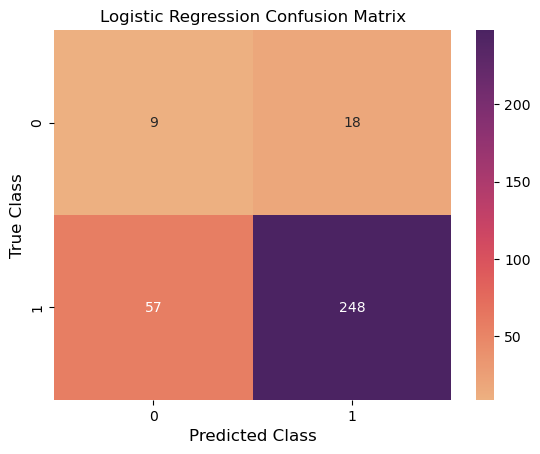

In [18]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, cmap = "flare", annot = True, fmt = "d")

plt.xlabel("Predicted Class", fontsize = 12)
plt.ylabel("True Class", fontsize = 12)
plt.title("Logistic Regression Confusion Matrix", fontsize = 12)
plt.show()

From the matrix, we can see that 9 = Correct(True Negatives), 18 = Wrong(False Positives), 57 = Wrong(False Negatives), 248 = Correct(True Positives).

### Precision Metric

In the classification report, we discover that when the model predicts "No Chronic Kidney Disease", it is **correct 14% of the time** which is not great. When it predicts "Chronic Kidney Disease", it is **right 93% of the time**

### Recall Metric

We discover that it catches *33% of "No Chronic Kidney Disease"* patients and *81% of "Chronic Kidney Disease"*

### F1 - Score

The weighted combination of precision & recall here, the ***"Chronic Kidney Disease"*** class is ***strong*** while ***"No Chronic Kidney Disease"*** is ***weak***

### Accuracy of the model is 77%

## Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)


In [20]:
random_forest = RandomForestClassifier(n_estimators = 200,
                                       max_depth = None,
                                       random_state = 42,
                                      class_weight = "balanced"
                                      )
random_forest.fit(x_train_resampled, y_train_resampled)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [21]:
y_pred = random_forest.predict(x_test)

In [22]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.9126506024096386

Confusion Matrix
 [[  1  26]
 [  3 302]]

Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.04      0.06        27
           1       0.92      0.99      0.95       305

    accuracy                           0.91       332
   macro avg       0.59      0.51      0.51       332
weighted avg       0.87      0.91      0.88       332



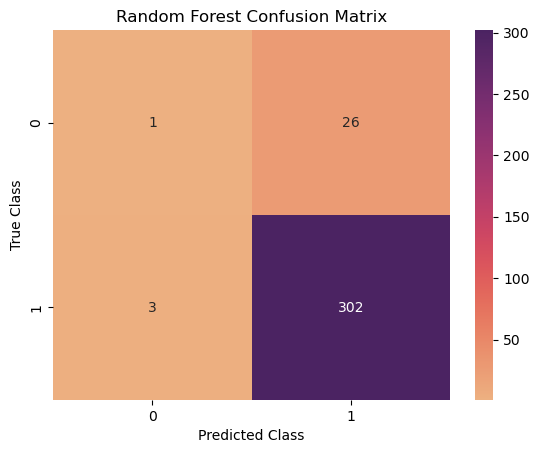

In [23]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap = "flare", annot = True, fmt = "d")

plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Random Forest Confusion Matrix")
plt.show()

### Accuracy of the model is 91%

## Support Vector Machine

In [24]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 



In [25]:
svm_model = SVC(kernel = "rbf", C=1, gamma = "scale", class_weight = "balanced", random_state = 42)



In [26]:
svm_model.fit(x_train, y_train)

,C,1
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,'balanced'
,verbose,False


In [27]:
y_pred = svm_model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.8765060240963856

Confusion Matrix:
 [[  5  22]
 [ 19 286]]

Classification Report:
               precision    recall  f1-score   support

           0       0.21      0.19      0.20        27
           1       0.93      0.94      0.93       305

    accuracy                           0.88       332
   macro avg       0.57      0.56      0.56       332
weighted avg       0.87      0.88      0.87       332



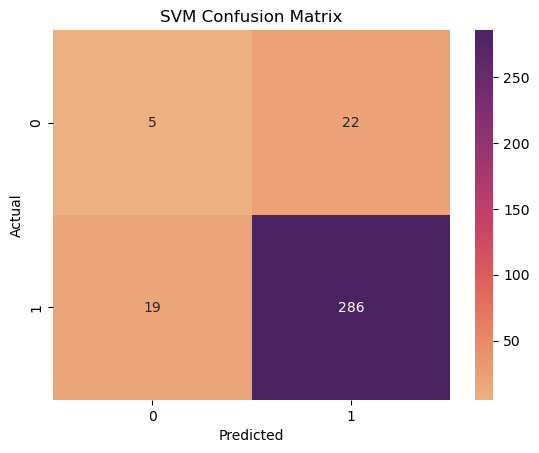

In [28]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot= True, fmt = "d", cmap = "flare")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()

### Accuracy of the model is 88%

## Classification Evaluation

In [29]:
log_reg_acc = accuracy_score(y_test, model.predict(x_test))
rf_acc = accuracy_score(y_test, random_forest.predict(x_test))
svm_acc = accuracy_score(y_test, svm_model.predict(x_test))

# Print results
print("Model Accuracies:")
print(f"Logistic Regression: {log_reg_acc:.4f}")
print(f"Random Forest:       {rf_acc:.4f}")
print(f"SVM:                 {svm_acc:.4f}")




Model Accuracies:
Logistic Regression: 0.7741
Random Forest:       0.9127
SVM:                 0.8765


This means the most accurate algorithm is the Random Forest algorithm

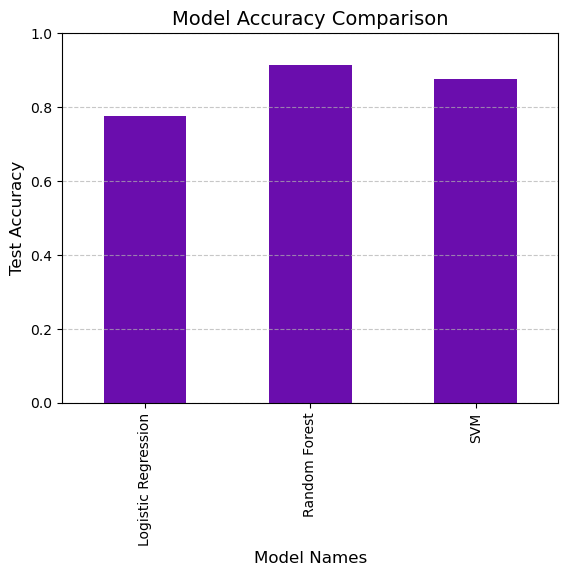

In [30]:
log = model.score(x_test, y_test)
rf = random_forest.score(x_test, y_test)
svm = svm_model.score(x_test, y_test)

# Create DataFrame
data = {"Name": ["Logistic Regression", "Random Forest", "SVM"],
        "Accuracy": [log, rf, svm]}

df = pd.DataFrame(data)
df.set_index("Name", inplace=True)

# Plot bar chart
df.plot(kind="bar", color=["#6A0DAD", "#FF6F61", "#1E90FF"], legend=False)
plt.title("Model Accuracy Comparison", fontsize=14)
plt.xlabel("Model Names", fontsize=12)
plt.ylabel("Test Accuracy", fontsize=12)
plt.ylim(0, 1)  # Keep y-axis between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()